In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("tech_fundings.csv")
df.head()

,index,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
0,1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,Jan-20
1,2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,Jan-20
2,3,api.video,https://api.video,France,Developer APIs,300000,Seed,Jan-20
3,4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,Jan-20
4,5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20


In [3]:
df.rename(columns={"Funding Amount (USD)":"Funding_Amount_(USD)", "Funding Stage":"Funding_Stage", "Funding Date":"Funding_Date"}, inplace=True)

In [4]:
df.head()

,index,Company,Website,Region,Vertical,Funding_Amount_(USD),Funding_Stage,Funding_Date
0,1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,Jan-20
1,2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,Jan-20
2,3,api.video,https://api.video,France,Developer APIs,300000,Seed,Jan-20
3,4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,Jan-20
4,5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20


In [5]:
df = df.iloc[:, 1:]
df.head()

,Company,Website,Region,Vertical,Funding_Amount_(USD),Funding_Stage,Funding_Date
0,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,Jan-20
1,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,Jan-20
2,api.video,https://api.video,France,Developer APIs,300000,Seed,Jan-20
3,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,Jan-20
4,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20


In [6]:
df["Funding_Date"].dtype

dtype('O')

In [7]:
df.isnull().sum()

Company                  0
Website                  0
Region                  12
Vertical                 0
Funding_Amount_(USD)     0
Funding_Stage            0
Funding_Date             0
dtype: int64

In [8]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent],axis=1, keys=["missing_number", "missing_percent"])
    return missing_values
missing(df)

,missing_number,missing_percent
Region,12,0.003357
Company,0,0.000000
Website,0,0.000000
Vertical,0,0.000000
Funding_Amount_(USD),0,0.000000
Funding_Stage,0,0.000000
Funding_Date,0,0.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               3575 non-null   object
 1   Website               3575 non-null   object
 2   Region                3563 non-null   object
 3   Vertical              3575 non-null   object
 4   Funding_Amount_(USD)  3575 non-null   object
 5   Funding_Stage         3575 non-null   object
 6   Funding_Date          3575 non-null   object
dtypes: object(7)
memory usage: 195.6+ KB


In [10]:
df['Funding_Date'] = "01-" +  df['Funding_Date']
df['Funding_Date'] = pd.to_datetime(df['Funding_Date'])
df.head()

,Company,Website,Region,Vertical,Funding_Amount_(USD),Funding_Stage,Funding_Date
0,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,2020-01-01
1,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,2020-01-01
2,api.video,https://api.video,France,Developer APIs,300000,Seed,2020-01-01
3,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,2020-01-01
4,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,2020-01-01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3575 entries, 0 to 3574
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Company               3575 non-null   object        
 1   Website               3575 non-null   object        
 2   Region                3563 non-null   object        
 3   Vertical              3575 non-null   object        
 4   Funding_Amount_(USD)  3575 non-null   object        
 5   Funding_Stage         3575 non-null   object        
 6   Funding_Date          3575 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 195.6+ KB


In [ ]:
a = "NaN"
df['Funding_Amount_(USD)'] = df['Funding_Amount_(USD)'].apply(lambda x: x.replace('Unknown',a))

In [ ]:
df['Funding_Amount_(USD)'] = df['Funding_Amount_(USD)'].astype(float)

In [12]:
df.shape

(3575, 7)

In [13]:
df = df.drop_duplicates(keep='first')

In [14]:
df["Region"] = df["Region"].fillna(value=df["Region"].mode()[0])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3575 entries, 0 to 3574
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Company               3575 non-null   object        
 1   Website               3575 non-null   object        
 2   Region                3575 non-null   object        
 3   Vertical              3575 non-null   object        
 4   Funding_Amount_(USD)  3575 non-null   object        
 5   Funding_Stage         3575 non-null   object        
 6   Funding_Date          3575 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 223.4+ KB


In [16]:
Region = df['Region'].value_counts().sort_values(ascending=False)

In [17]:
Region = Region.reset_index().rename(columns={'index':'Region','Region':'Total_No.'})
Region.head(10)

,Region,Total_No.
0,United States,2046
1,United Kingdom,319
2,India,156
3,Canada,111
4,Germany,101
5,France,96
6,Israel,93
7,Australia,53
8,Singapore,50
9,Spain,42


In [18]:
df.columns

Index(['Company', 'Website', 'Region', 'Vertical', 'Funding_Amount_(USD)',
       'Funding_Stage', 'Funding_Date'],
      dtype='object')

In [19]:
Vertical = df["Vertical"].value_counts().sort_values(ascending=False)

In [20]:
Vertical = Vertical.reset_index().rename(columns={'index':'Vertical','Vertical':'Total_No.'})
Vertical.head(15)

,Vertical,Total_No.
0,B2B Software,632
1,Cloud Computing,288
2,Artificial Intelligence,283
3,Finance,255
4,Blockchain,244
5,Cyber Security,147
6,Health Care,139
7,Education,104
8,FinTech,104
9,E-Commerce Store,95


In [21]:
del df["Website"]
df.head()

,Company,Region,Vertical,Funding_Amount_(USD),Funding_Stage,Funding_Date
0,Internxt,Spain,Blockchain,278940,Seed,2020-01-01
1,Dockflow,Belgium,Logistics,292244,Seed,2020-01-01
2,api.video,France,Developer APIs,300000,Seed,2020-01-01
3,Buck.ai,United States,Artificial Intelligence,300000,Seed,2020-01-01
4,Prodsight,United Kingdom,Artificial Intelligence,529013,Seed,2020-01-01


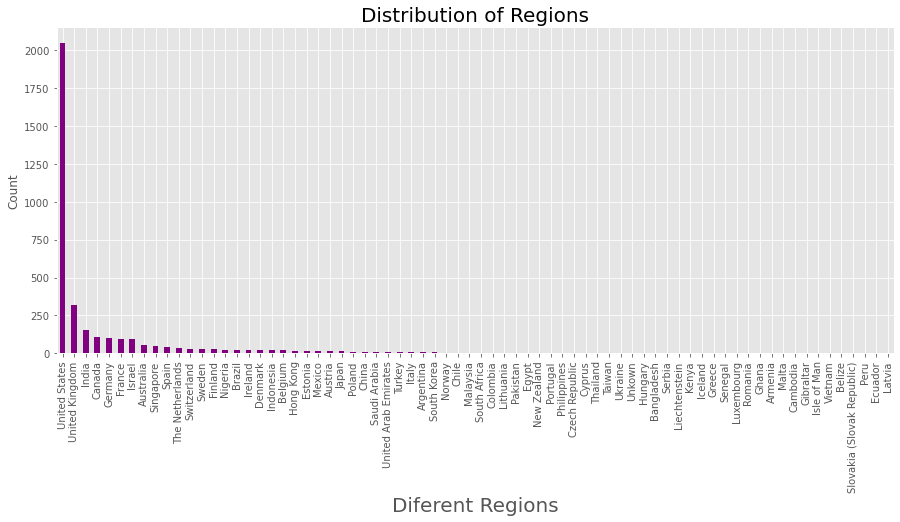

In [22]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('ggplot')

df['Region'].value_counts().plot(kind = 'bar', color = 'purple')
plt.title('Distribution of Regions', fontsize = 20)
plt.xlabel('Diferent Regions', fontsize = 20)
plt.ylabel('Count')
plt.show()

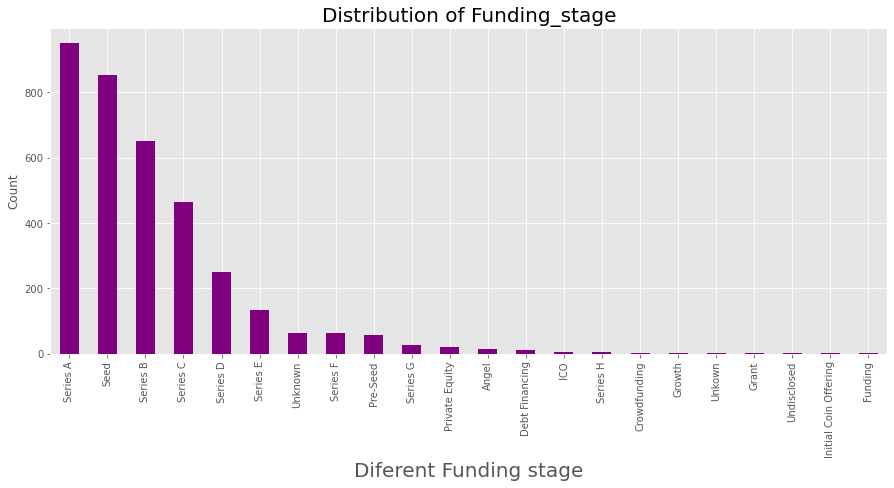

In [23]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('ggplot')

df['Funding_Stage'].value_counts().plot(kind = 'bar', color = 'purple')
plt.title('Distribution of Funding_stage', fontsize = 20)
plt.xlabel('Diferent Funding stage', fontsize = 20)
plt.ylabel('Count')
plt.show()

In [24]:
top_10_by_company = df.sort_values('Company',ascending=False)
top_10_by_company.head(10)

,Company,Region,Vertical,Funding_Amount_(USD),Funding_Stage,Funding_Date
2469,ÅURA,Finland,Health Care,100000000,Series C,2021-05-01
119,ÅURA,Finland,Fitness,28000000,Series B,2020-03-01
3082,yellow.ai,United States,B2B Software,78150000,Series C,2021-08-01
2719,wefox,Germany,Insurance,650000000,Series C,2021-06-01
2344,vagon,Sweden,Cloud Computing,480109,Seed,2021-05-01
1419,uLesson,Nigeria,Education,7500000,Series A,2021-01-01
3301,tugesto,Spain,B2B Software,410654,Angel,2021-09-01
1749,tickr,United Kingdom,Investing,3400000,Seed,2021-02-01
2350,thingsTHINKING,Germany,Cloud Computing,5463227,Seed,2021-05-01
1440,tealbook,Canada,B2B Software,14400000,Series A,2021-01-01


In [25]:
top_10_by_company = df.sort_values('Funding_Amount_(USD)',ascending=False)
top_10_by_company.head(10)

,Company,Region,Vertical,Funding_Amount_(USD),Funding_Stage,Funding_Date
1301,Unacademy,India,Education,Unknown,Unknown,2020-11-01
1285,Azion,United States,Cloud Computing,Unknown,Unknown,2020-11-01
1310,Level,United States,Finance,Unknown,Grant,2020-11-01
1262,Mobilewalla,United States,B2B Software,Unknown,Seed,2020-11-01
1284,Pensando,United States,Cloud Computing,Unknown,Unknown,2020-11-01
1293,Digify,United States,Cyber Security,Unknown,Seed,2020-11-01
1263,Hypotenuse,United States,B2B Software,Unknown,Seed,2020-11-01
1264,DropSuite,Singapore,B2B Software,Unknown,Seed,2020-11-01
1327,Push Party,United States,Social Network,Unknown,Seed,2020-11-01
1815,FloBiz,India,B2B Software,9998304,Series A,2021-03-01


In [29]:
a = "NaN"
df['Funding_Amount_(USD)'] = df['Funding_Amount_(USD)'].apply(lambda x: x.replace('Unknown',a))

In [30]:

df['Funding_Amount_(USD)'] = df['Funding_Amount_(USD)'].astype(float)

In [31]:
df['Funding_Amount_(USD)'].dtype

dtype('float64')